# Impute Numeric Data

2 ways 
- univariate (we take ref of same col in which we are filling)
- multivariate (we take ref of all the cols not just the col we are trying to fill in)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

# Mean / Median

- if data normally distributed - mean
- if not - median

- adv : simple
- disadv : works only for less than 5% data missing, distribution change, outliers occur coz most filled by mean, corr_cov change

- use when : MCAR, 5% <

- can be done by pandas - fillna, scikit - imputer


In [21]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [29]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [32]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
112,22.0,8.0500,0,22.00,22.000000,8.0500,8.0500
625,61.0,32.3208,0,61.00,61.000000,32.3208,32.3208
334,NaN,133.6500,1,28.75,29.785904,133.6500,133.6500
294,24.0,7.8958,0,24.00,24.000000,7.8958,7.8958
57,28.5,7.2292,0,28.50,28.500000,7.2292,7.2292


In [33]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print('-------------------------------')
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
-------------------------------
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


mostly the variance lowers coz variable = spread of the data, as the data is mostly the means now spread lowers

- age variance was affected more coz it had more missing values

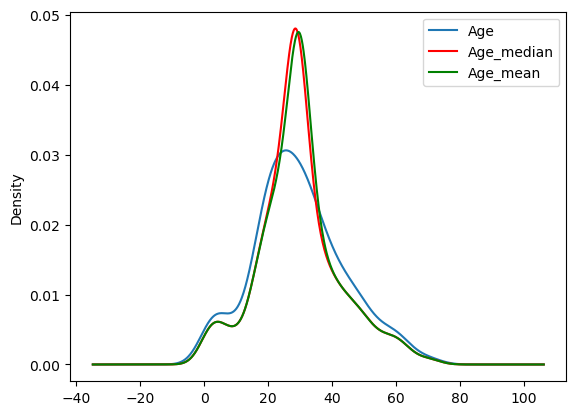

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

drastic change

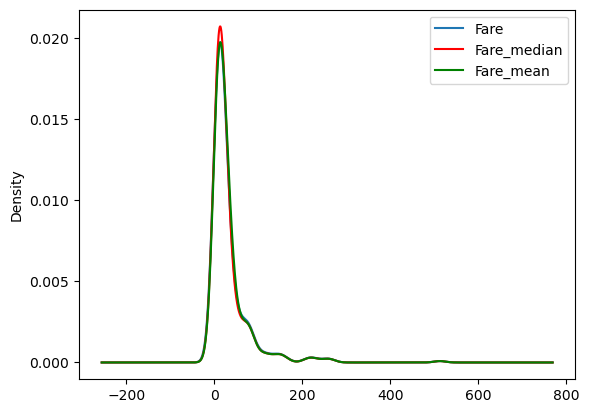

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [40]:
X_train.cov()[['Age', 'Age_median', 'Age_mean']]  # interaction change

,Age,Age_median,Age_mean
Age,204.349513,204.349513,204.349513
Fare,70.719262,57.957599,55.603719
Family,-6.498901,-5.112563,-5.146106
Age_median,204.349513,161.989566,161.812625
Age_mean,204.349513,161.812625,161.812625
Fare_median,64.858859,53.553455,51.358000
Fare_mean,66.665205,55.023037,52.788341


In [39]:
X_train.corr()   # relation change

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

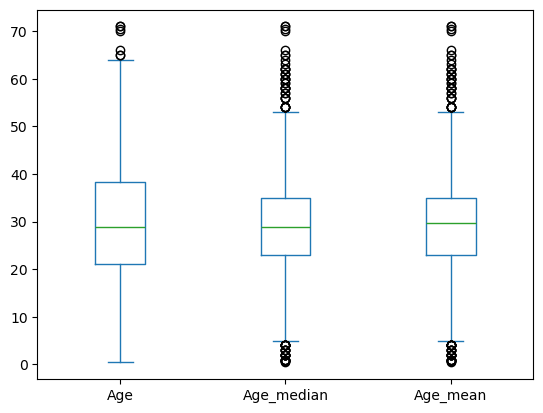

In [41]:
X_train[['Age', 'Age_median', 'Age_mean']].plot(kind='box')

considered many as outliers which were initially not. coz IQR shrinked due to many means

<Axes: >

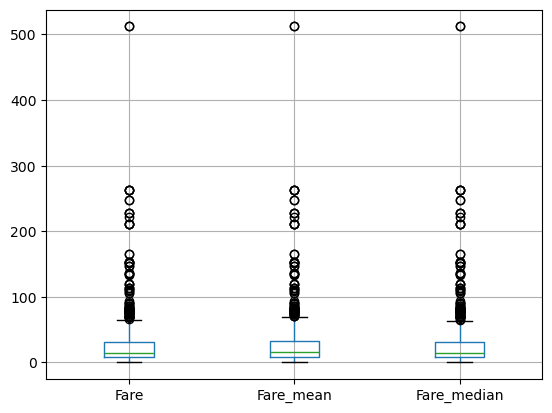

In [42]:
X_train[['Fare','Fare_mean', 'Fare_median']].boxplot()

not much change as not many means put

### using sklearn instead of fillna

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [56]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [57]:
trf.fit(X_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [58]:
trf.named_transformers_['imputer1'].statistics_  # mean of age

array([28.75])

In [59]:
trf.named_transformers_['imputer2'].statistics_  # median of fare

array([32.61759689])

In [60]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

# Arbitary value imputation (Random)

in cat data replace NA with "missing" word or the something really different like -1, 99.999 to differentiate it as missing
- disadv: ditribution distort, var and covar changes 
- use when : data not Missing at random but has pattern

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
X_train['Age_99'] = X_train['Age'].fillna(99)  
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [65]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())
print('-------------------------------')
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 99 imputation: ', X_train['Fare_99'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 imputation:  951.7275570187172
Age Variance after -1 imputation:  318.0896202624484
-------------------------------
Original Fare variable variance:  2448.197913706318
Fare Variance after 99 imputation:  2536.0773428319685
Fare Variance after -1 imputation:  2378.5676784883503


drastic change

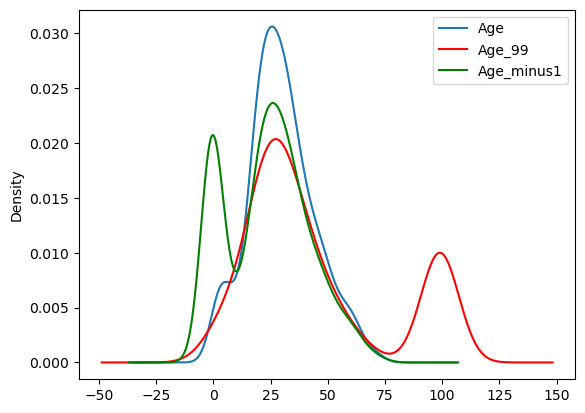

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

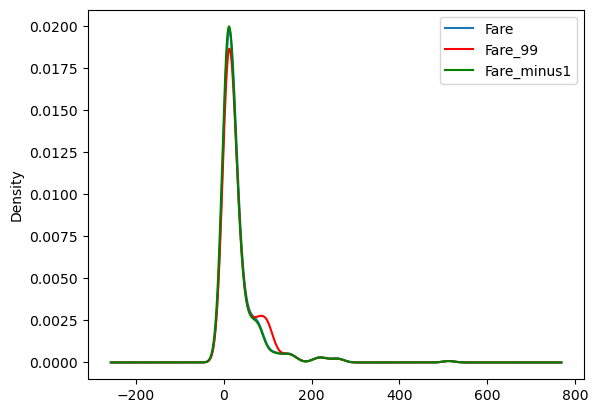

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the 99
X_train['Fare_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the -1
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Using Sklearn

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [70]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
],remainder='passthrough')

In [71]:
trf.fit(X_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [72]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

# End Of Distribution Imputation

extension of arbitary
It solves the problem of choosing which arbitary value to fill in with.
- if the col is normally distributed : fill in with 
    (mean + 3*S.D) or (mean - 3*S.D)
- if skewed : IQR proximity rule : Q1 - 1.5*IQR or Q3 + 1.5*IQR

these help us find that number which should be used to fill in